In [ ]:
#Note: plot_x will be deprecated; Please use Plotter class for more features.
#https://github.com/maddytae/pytae/blob/master/src/plotter.ipynb

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pytae as pt

df = pd.DataFrame({
    'Category': ['A','B','C','C'],
    'Value': [10, 20, 30, 40],
    'Group': ['G1', 'G1', 'G2', 'G2']
})

df['Group']=pd.Categorical(df['Group'], categories=['G2','G1'],ordered=True)

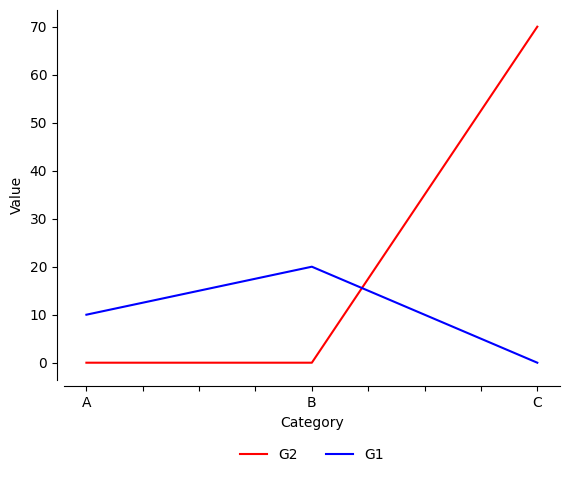

In [28]:
#does not support scatter yet
fig, ax = plt.subplots()
df.plot_x(ax=ax, x='Category', y='Value',by='Group',xlabel='Category',
          color={'G1':'blue', 'G2':'red'},aggfunc='sum')
plt.show()

Group Category  G2  G1
0            A   0  10
1            B   0  20
2            C  70   0


<Axes: xlabel='Category', ylabel='Value'>

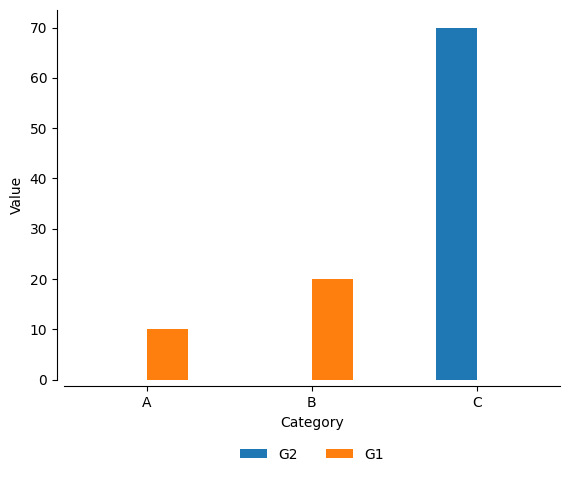

In [29]:
fig, ax = plt.subplots()
df.plot_x(ax=ax, x='Category', y='Value',by='Group',kind='bar',print_data=True,clip_data=False)

Python(49166) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


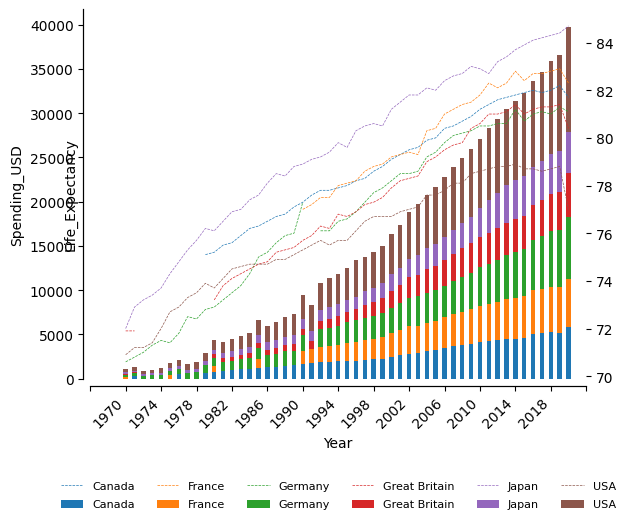

In [30]:
#A little more elaborate example

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pytae as pt
import seaborn as sns

h= sns.load_dataset("healthexp")
# h=h[h['Country']=='Germany']

fig, ax = plt.subplots()
ax2=ax.twinx()
ax.clear()
ax2.clear()
h.plot_x(ax=ax,x='Year',y='Spending_USD',by='Country',kind='bar',stacked=True)
h.plot_x(ax=ax2,clip_data=True,x='Year',y='Life_Expectancy',by='Country',kind='line',
         linewidth=0.5,linestyle='--')

# Set locator to show every fourth label
ax.xaxis.set_major_locator(ticker.MultipleLocator(4))

ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add legends
h, l = ax.get_legend_handles_labels()
ax.legend(h, l, bbox_to_anchor=(0.5, -0.3), ncol=10, frameon=False, loc='upper center', fontsize=8)

h, l = ax2.get_legend_handles_labels()
ax2.legend(h, l, bbox_to_anchor=(0.5, -0.25), ncol=10, frameon=False, loc='upper center', fontsize=8)
# Show plot
plt.show()

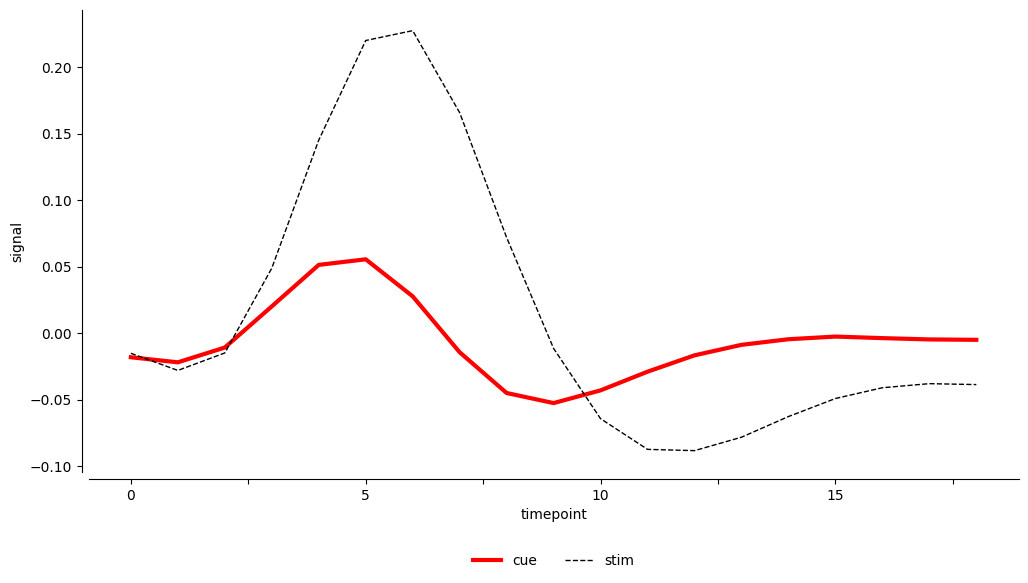

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import seaborn as sns

# Assuming your plot_x function and customize_spines method are already defined

# Load the fmri dataset
fmri = sns.load_dataset('fmri')
fmri

# Plot the data using the plot_x function
fig, ax = plt.subplots(figsize=(12, 6))
plt.close()

color={'cue':'red','stim':'black'}
style={'cue':'-','stim':'--'}
width={'cue':3,'stim':1}


fmri.plot_x(ax=ax, x='timepoint', y='signal', by='event', kind='line',aggfunc='mean',
            style=style,color=color,width=width)


# Show the plot
fig

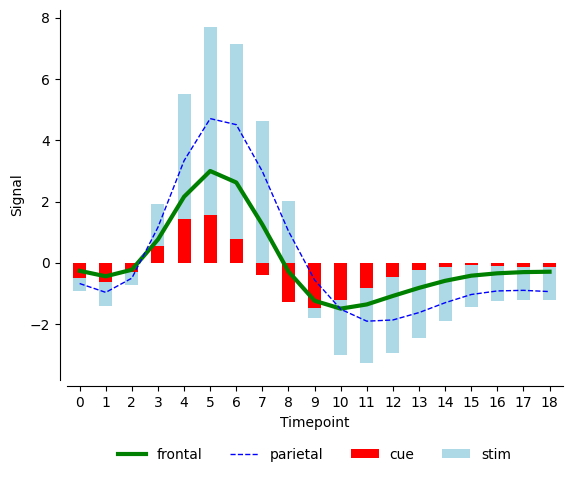

In [32]:
color={'cue':'red','stim':'lightblue','frontal':'green','parietal':'blue'}
style={'cue':'-','stim':'--'}
width={'cue':3,'stim':1}

fig, ax = plt.subplots()
plt.close()
fmri.plot_x(x='timepoint',y='signal',by='region',aggfunc='sum',
            ax=ax,
            color=color,
            style=style,
            width=width
           )
fmri.plot_x(x='timepoint',y='signal',by='event',
            aggfunc='sum',kind='bar',ax=ax,stacked=True
           ,xlabel='Timepoint',ylabel='Signal',color=color)
fig

<Axes: ylabel='tip'>

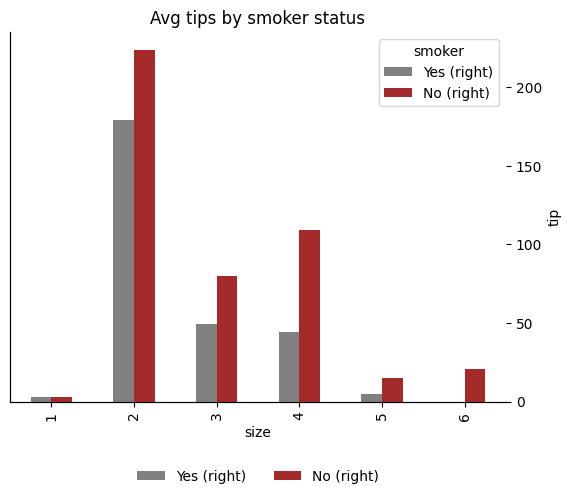

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
fig, ax = plt.subplots()

def customize_spines(self):
    self.spines['left'].set_position(('outward', 5))
    self.spines['bottom'].set_position(('outward', 5))
    self.spines['right'].set_visible(False)
    self.spines['top'].set_visible(False)

def hide_spines(self):
    self.spines['left'].set_visible(False)
    self.spines['bottom'].set_visible(False)
    self.spines['right'].set_visible(False)
    self.spines['top'].set_visible(False)

Axes.customize_spines = customize_spines
Axes.hide_spines = hide_spines

# Wrapper function
def plot_x(self, ax=None, x=None, y=None, by=None, clip_data=False, print_data=False, aggfunc='sum', 
           dropna=False, **plot_kwargs):
    """
        Plots data from a pivot table, allowing customization of plot type and appearance.
    
        Parameters:
        - ax (matplotlib.axes.Axes, optional): The axes on which to plot. If None, a new figure and axes will be created.
        - x (str): Column name to use for the x-axis.
        - y (str): Column name to use for the y-axis.
        - by (str): Column name to group by for pivoting the table.
        - clip_data (bool, optional): If True, copies the resulting pivot table to the clipboard. Default is False.
        - print_data (bool, optional): If True, prints the resulting pivot table. Default is False.
        - aggfunc (str or function, optional): Aggregation function to use for the pivot table. Default is 'sum'.
        - dropna (bool, optional): If True, excludes missing values from the pivot table. Default is False.
        - **plot_kwargs: Additional keyword arguments passed to pandas' plot method.
    
        Special `plot_kwargs` for 'line' plots:
        - style (dict, optional): A dictionary mapping each `by` value to a line style (e.g., '-', '--').
        - width (dict, optional): A dictionary mapping each `by` value to a line width.
    
        Returns:
        - ax (matplotlib.axes.Axes): The axes with the plotted data.
    
        Notes:
        - Scatter plots are not supported and will raise a warning.
        - The function assumes that the x-axis is not numeric.
        - For `kind='line'`, `style` and `width` are removed before plotting and then reapplied afterward to bypass crrent pandas           limitations.
        - xlabel and ylabel by default are x and y unless it is not passed specifically.
    """
    show_legend = plot_kwargs.pop('legend', True)
    kind = plot_kwargs.pop('kind', 'line')  # 'line' is the default in pandas.plot

    if kind == 'scatter':
        print("Scatter plot is not supported yet!")
        return
        

    # Store and remove style and width if kind == 'line' 
    #https://github.com/pandas-dev/pandas/issues/59461

    style = plot_kwargs.pop('style', None) if kind == 'line' else None
    width = plot_kwargs.pop('width', None) if kind == 'line' else None

    # Remove xlabel and ylabel from plot_kwargs to avoid conflict
    xlabel = plot_kwargs.pop('xlabel', x)
    ylabel = plot_kwargs.pop('ylabel', y)

    pivot_table = self.pivot_table(index=x, columns=by, values=y,
                                   aggfunc=aggfunc, dropna=dropna, observed=False).reset_index()
    pivot_table[x] = pivot_table[x].astype('object')  # Ensure x-axis is not numeric
    
    if print_data:
        print(pivot_table)
    if clip_data:
        pivot_table.to_clipboard(index=False)
    


    ax = pivot_table.plot(ax=ax, x=x, kind=kind,xlabel=xlabel,ylabel=ylabel, **plot_kwargs)
    # Create secondary axis if specified
    secondary_y = plot_kwargs.get('secondary_y', False)

    for ax in fig.axes:
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)



    # Reapply color and style if kind == 'line'
    if kind == 'line':

        if style:
            for line, (name, style_value) in zip(ax.get_lines(), style.items()):
                line.set_linestyle(style_value)
        if width:
            for line, (name, width_value) in zip(ax.get_lines(), width.items()):
                line.set_linewidth(width_value)

    

    if show_legend:
        ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=10, frameon=False)
    
    return ax


# Attach the function to pandas DataFrame
pd.DataFrame.plot_x = plot_x

# Example usage
color = {'cue': 'blue', 'stim': 'black', 'parietal': 'red', 'frontal': 'green', 'Male': 'blue', 'Female': 'pink', 'Dinner': 'green', 'Lunch': 'orange', 'Yes': 'grey', 'No': 'brown'}
style = {'cue': '-', 'stim': '--'}
width = {'cue': 3, 'stim': 1}
marker = {'Male': 'o', 'Female': 'x'}
size = {'Male': 10, 'Female': 20}

tips = pt.sample_data['tips']
tips.plot_x(ax=ax,x='size', y='tip', by='smoker', kind='bar', color=color, title='Avg tips by smoker status', secondary_y=True)


The left spine is visible.
The right spine is visible.
The bottom spine is visible.
The top spine is visible.


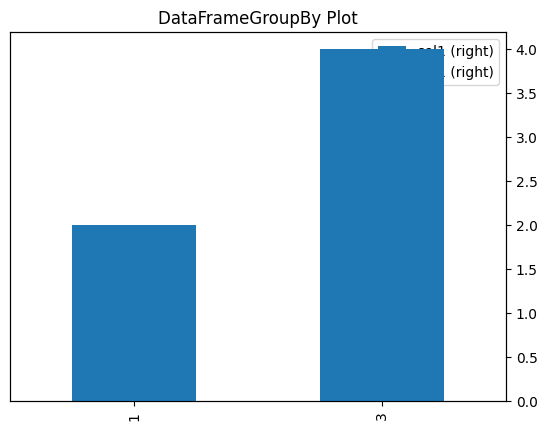

In [46]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()
df = pd.DataFrame({"col1" : [1, 2, 3, 4],
                  "col2" : ["A", "B", "A", "B"]})
plot = df.groupby("col2").plot(kind="bar", title="DataFrameGroupBy Plot",ax=ax,secondary_y=True)
# Loop through all spines and check their visibility


for spine_name, spine in ax.spines.items():
    visibility = spine.get_visible()
    print(f"The {spine_name} spine is {'visible' if visibility else 'not visible'}.")


In [47]:
# Get all axes in the figure
all_axes = fig.axes

# Loop through and print each Axes object
for i, ax in enumerate(all_axes, start=1):
    print(f"Axes {i}: {ax}")

Axes 1: Axes(0.125,0.11;0.775x0.77)
Axes 2: Axes(0.125,0.11;0.775x0.77)


In [48]:
# Get all axes in the figure
all_axes = fig.axes

# Loop through each Axes object
for i, ax in enumerate(all_axes, start=1):
    print(f"Axes {i}: {ax}")
    # Loop through each spine in the Axes object
    for spine_name, spine in ax.spines.items():
        # Print the spine name and its visibility status
        print(f"  Spine: {spine_name}, Visible: {spine.get_visible()}")

Axes 1: Axes(0.125,0.11;0.775x0.77)
  Spine: left, Visible: True
  Spine: right, Visible: True
  Spine: bottom, Visible: True
  Spine: top, Visible: True
Axes 2: Axes(0.125,0.11;0.775x0.77)
  Spine: left, Visible: True
  Spine: right, Visible: True
  Spine: bottom, Visible: True
  Spine: top, Visible: True


In [52]:
for ax in fig.axes:
    print(ax)
    for spine_name, spine in ax.spines.items():
        visibility = spine.get_visible()
        print(f"The {spine_name} spine is {'visible' if visibility else 'not visible'}.")


Axes(0.125,0.11;0.775x0.77)
The left spine is visible.
The right spine is visible.
The bottom spine is visible.
The top spine is visible.
Axes(0.125,0.11;0.775x0.77)
The left spine is visible.
The right spine is visible.
The bottom spine is visible.
The top spine is visible.


Axes 1: Axes(0.125,0.11;0.352273x0.77)
Axes 2: Axes(0.547727,0.11;0.352273x0.77)
Axes 3: Axes(0.547727,0.11;0.352273x0.77)


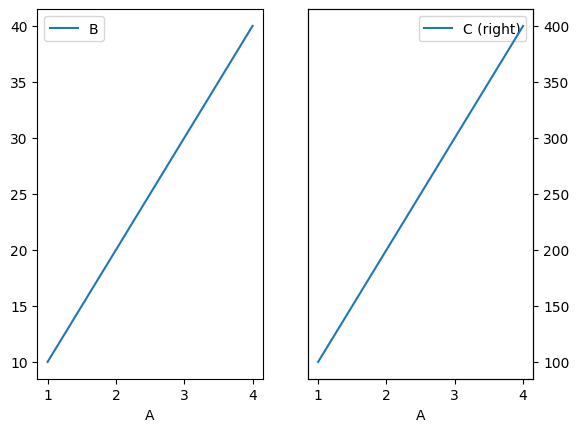

In [54]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
df = pd.DataFrame({
    'A': [1, 2, 3, 4],
    'B': [10, 20, 30, 40],
    'C': [100, 200, 300, 400]
})

# Create subplots using subplot_mosaic
fig, axd = plt.subplot_mosaic(mosaic='AB')

# Plot on subplot A (no secondary y-axis)
df.plot(x='A', y='B', kind='line', ax=axd['A'])

# Plot on subplot B with a secondary y-axis
df.plot(x='A', y='C', kind='line', secondary_y=True, ax=axd['B'])

# Check all axes in the figure
for i, axis in enumerate(fig.axes):
    print(f"Axes {i+1}: {axis}")


In [55]:
# Loop through all axes in the figure
for i, axis in enumerate(fig.axes):
    print(f"Figure Axes {i+1}: {axis}")


Figure Axes 1: Axes(0.125,0.11;0.352273x0.77)
Figure Axes 2: Axes(0.547727,0.11;0.352273x0.77)
Figure Axes 3: Axes(0.547727,0.11;0.352273x0.77)


In [56]:
# Get all axes in subplot B
for i, axis in enumerate([axd['B'], axd['B'].get_shared_x_axes().get_siblings(axd['B'])[1]]):
    print(f"Subplot B Axes {i+1}: {axis}")


Subplot B Axes 1: Axes(0.547727,0.11;0.352273x0.77)
Subplot B Axes 2: Axes(0.547727,0.11;0.352273x0.77)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


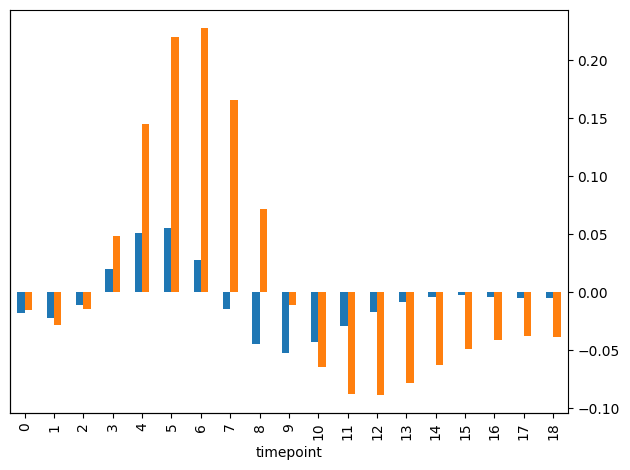

In [73]:

fmri = pt.sample_data['fmri']
k = pt.Plotter() #This is how you can initiate a pt plot

(k
.data(fmri) #define data
.plot(x='timepoint', y='signal',by='event',aggfunc='mean',kind='bar',secondary_y=True)  #define plot usually with x, y and by
.finalize() #finalize the plot
)
k.fig

In [75]:
for i, axis in enumerate(k.fig.axes):

    print(f"Figure Axes {i+1}: {axis}")

 self.spines['top'].set_visible(False)

Figure Axes 1: Axes(0.0234375,0.129225;0.871723x0.839525)
Figure Axes 2: Axes(0.0234375,0.129225;0.871723x0.839525)


Axes(0.0234375,0.129225;0.871723x0.839525)
Axes(0.0234375,0.129225;0.871723x0.839525)


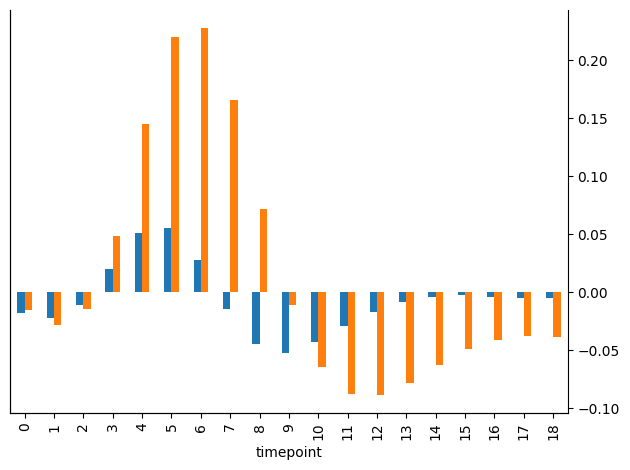

In [78]:
for ax in k.fig.axes:
    print(ax)
    ax.spines['top'].set_visible(False)
k.fig

